In [1]:
%matplotlib inline 
import cv2
import skimage
from matplotlib import pyplot as plt

In [2]:
def read_image(img_path):
    img_bgr = cv2.imread(img_path)
    img = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
    return img

In [3]:
img1_path = 'dataset/test/images/Herodias with the Head of Saint John the Baptist.png'
img1 = read_image(img1_path)

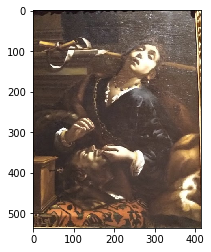

In [4]:
plt.imshow(img1)

# hash

In [5]:
import imagehash
from PIL import Image
from pathlib import Path

In [6]:
def hash(img):
    return imagehash.average_hash(img)
hash1 = hash(Image.fromarray(img1))

# match

In [7]:
images_dir = Path('dataset/true/images/')
def is_image(image_path):
    p = str(image_path).lower()
    return p.endswith('jpg') or p.endswith('.png')
images_path = list(
    image_dir for image_dir in images_dir.iterdir()
    if is_image(image_dir))

In [8]:
def get_diff(image_path, hash1):
    img2 = read_image(image_path)
    hash2 = hash(Image.fromarray(img2))
    return hash1 - hash2

In [9]:
diffs = [get_diff(str(image_path), hash1) for image_path in images_path]

In [10]:
import numpy as np

(array([0., 1., 0., 0., 0., 0., 0., 2., 0., 2., 1., 5., 3., 1., 1., 7., 3.,
        5., 6., 3., 8., 3., 7., 2., 4., 5., 2., 1., 0., 1., 0., 1., 0., 0.,
        0.]),
 array([14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30,
        31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47,
        48, 49]),
 <a list of 35 Patch objects>)

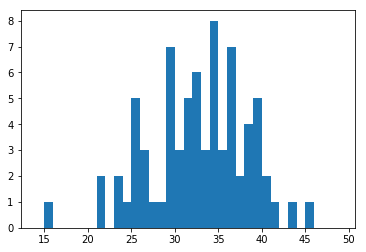

In [27]:
plt.hist(diffs, bins=np.arange(14, 50, 1))

In [11]:
np.argmin(diffs)

30

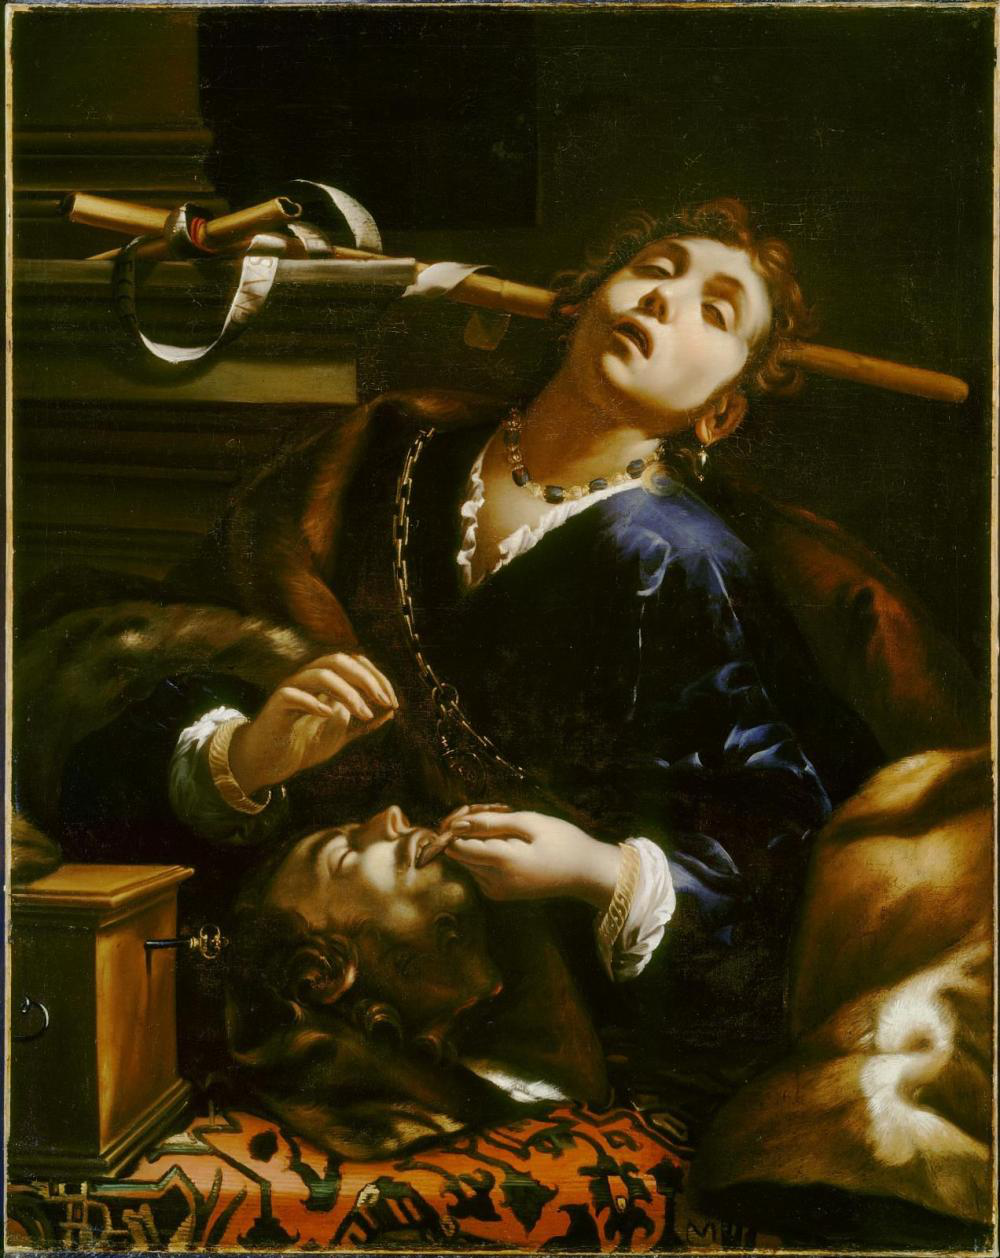

In [12]:
Image.open(images_path[30])